In [1]:
import requests
import unicodedata

### Scrape Wikipedia for Hebrew words

In [2]:
def is_hebrew2(s):
    return all("\u0590" <= c <= "\u05EA" for c in s)

In [3]:
def n_random_wiki_pages(n=10):
    unique_urls = set()
    while n > 0:
        RANDOM_WIKI_PAGE_GENERATOR = 'https://he.wikipedia.org/wiki/%D7%9E%D7%99%D7%95%D7%97%D7%93:%D7%90%D7%A7%D7%A8%D7%90%D7%99'
        req = requests.get(RANDOM_WIKI_PAGE_GENERATOR)
        if req.url not in unique_urls:
            unique_urls.add(req.url)
            yield req.text
        n -= 1

In [4]:
N = 2000
heb_words = []
for text in n_random_wiki_pages(N):
    tmp = [x for x in text.split(' ') if is_hebrew2(x) and len(x) == 5]
    heb_words += tmp

In [5]:
len(heb_words), len(set(heb_words))

(306474, 23072)

In [6]:
import random
print(random.choices(heb_words, k=100))

['דוגמה', 'בעליה', 'שישנם', 'קלהון', 'סינית', 'ערכים', 'התוכן', 'הוצאת', 'ערכים', 'יהודה', 'ביוני', 'לעשות', 'שישנם', 'ערכים', 'מעשים', 'השחקן', 'הרומי', 'התברר', 'אצולה', 'ניהלה', 'מאמין', 'ערכים', 'עידוש', 'ומידת', 'לצורך', 'תנאים', 'ממשלת', 'לצורך', 'תמונת', 'השלמה', 'ערכים', 'תומכת', 'מְאֹד', 'מתמקד', 'קלגרי', 'בדפים', 'שנעשו', 'שמשמש', 'התבטא', 'לעשות', 'לעשות', 'גרירה', 'לשלוף', 'הפקות', 'מושלם', 'ארצות', 'הראשי', 'הברית', 'חשבון', 'חובות', 'שלושה', 'לעשות', 'התגלו', 'החולה', 'פעולה', 'אוויר', 'האלים', 'מרכזי', 'התוכן', 'הקדוש', 'ולאחר', 'התוכן', 'לעשות', 'המפקח', 'תרגום', 'מפרטי', 'לעמוד', 'ושמאל', 'יהודה', 'סופרי', 'לכנסת', 'הצעיד', 'תווית', 'במזרח', 'התוכן', 'להכנת', 'הקדוש', 'מופיע', 'ערכים', 'חשבון', 'לעומת', 'תווית', 'שנפוץ', 'חשבון', 'תצוגת', 'משמאל', 'הראשי', 'ומדיה', 'הגוון', 'הוגשו', 'ליצור', 'הנתון', 'הנשיא', 'גירוש', 'יציאת', 'מצלמת', 'שאלות', 'להגיע', 'לינדה', 'ערכים']


### Count letters frequencies

In [7]:
counter = dict()
total_count = 0
for word in set(heb_words):
    for chr_ in word:
        counter[chr_] = counter.get(chr_, 0) + 1
        total_count += 1

In [8]:
sorted_counter = dict(sorted(counter.items())) # sort by abc

In [9]:
import copy
frequencies = copy.deepcopy(sorted_counter)
for key in frequencies:
    frequencies[key] = frequencies[key] / total_count

In [10]:
# frequencies

In [11]:
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1431 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1434 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packag

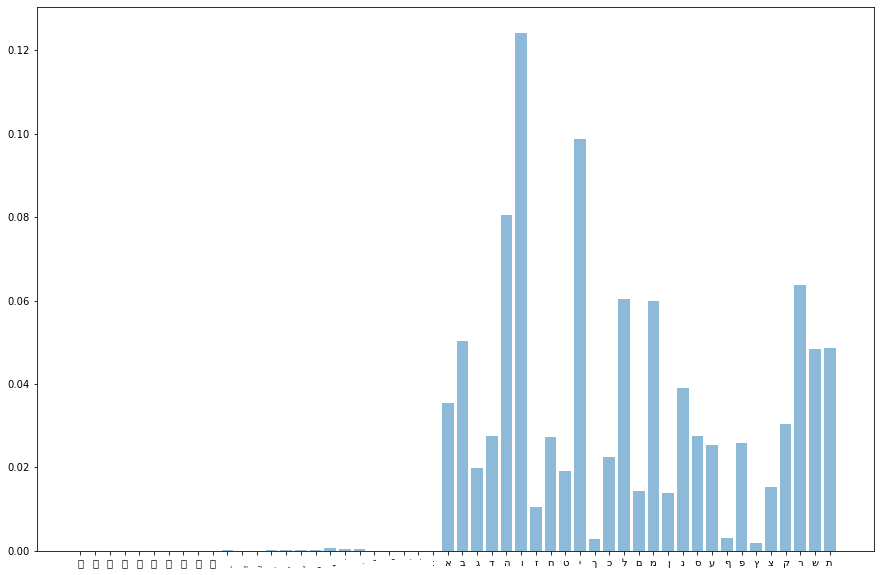

In [12]:
letters = frequencies.keys()
y_pos = np.arange(len(letters))
plt.figure(figsize=(15, 10))
plt.bar(y_pos, frequencies.values(), align='center', alpha=0.5)
plt.xticks(y_pos, letters)
plt.show()

### Find best 1st words(all unique chars)

In [13]:
heb_words_six_uniq_chrs = set()

for word in heb_words:
    skip = False
    word2 = list(word)
    while len(word2) > 0:
        c = word2.pop()
        if c in word2:
            skip = True
            
    if not skip:
        heb_words_six_uniq_chrs.add(word)

In [14]:
# score each by letters freq
scored_first_words = dict()
for word in heb_words_six_uniq_chrs:
    score = sum(frequencies[c] for c in word)
    scored_first_words[word] = score

In [15]:
sorted(scored_first_words.items(), key=lambda x: x[1], reverse=True)

[('ליורה', 0.4277392510402219),
 ('מהורי', 0.4271064493758669),
 ('הרומי', 0.4271064493758669),
 ('ומהרי', 0.4271064493758669),
 ('ומהיר', 0.4271064493758669),
 ('הימור', 0.42710644937586684),
 ('המירו', 0.42710644937586684),
 ('ומריה', 0.42710644937586684),
 ('הרימו', 0.42710644937586684),
 ('מיהרו', 0.42710644937586684),
 ('ולימה', 0.4237257281553398),
 ('הבירו', 0.4175624133148405),
 ('ביורה', 0.41756241331484045),
 ('ובירה', 0.41756241331484045),
 ('וריבה', 0.41756241331484045),
 ('הותיר', 0.416002080443828),
 ('התירו', 0.416002080443828),
 ('והיתר', 0.416002080443828),
 ('והתיר', 0.416002080443828),
 ('ויתרה', 0.416002080443828),
 ('הורית', 0.416002080443828),
 ('הורתי', 0.416002080443828),
 ('היותר', 0.41600208044382797),
 ('והשיר', 0.415620665742025),
 ('והישר', 0.415620665742025),
 ('הוריש', 0.415620665742025),
 ('ירושה', 0.41562066574202494),
 ('שרויה', 0.41562066574202494),
 ('היושר', 0.41562066574202494),
 ('ושירה', 0.41562066574202494),
 ('היורש', 0.41562066574202494),
 ('ש

### Find 2nd word

In [16]:
# count word freq
heb_words_freq = dict()
total = len(heb_words)
for word in set(heb_words):
    heb_words_freq[word] = heb_words.count(word) / total
heb_words_freq = dict(sorted(heb_words_freq.items(), key=lambda x: x[1], reverse=True)) # sort by freq

In [17]:
def score(w, ignore_list):
    '''calc the mean letter freq'''
    return sum(frequencies[c] if c not in ignore_list else 0 for c in set(w)) / len(w)

In [28]:
GRAY = ['ה', 'מ', 'ו', 'ר', 'ת', 'ב', 'ש', 'ל', 'ע', 'ם']
YELLOW = [('נ', 2), ('ק', 3)]
GREEN = [('י', 4)]

# =====

matches = set()

for word, freq in heb_words_freq.items():
    match = True
    for c in GRAY:
        if c in word:
            match = False
            break
    
    if match == True:
        for c, pos in YELLOW:
            if c not in word or word[pos - 1] == c:
                match = False
                break
            
    if match == True:
        for c, pos in GREEN:
            if word[pos - 1] != c:
                match = False
                break
    if match:
        matches.add((word, freq, score(word, GRAY + [s for _, s in YELLOW + GREEN])))

In [29]:
sorted(matches, key=lambda x: x[2], reverse=True)

[('קאנין', 3.262919529878554e-06, 0.04351595006934812),
 ('נקניק', 9.788758589635662e-06, 0.033625173370319)]